# Importing libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [3]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

# Preparing Data

In [4]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

# Defining and Training the Model

In [5]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        self.a1 = None
        self.l1 = None
        self.l2 = None
    
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = torch.sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        return torch.sigmoid(self.l2)

In [12]:
def train(data_set, model, criterion, train_loader, optimizer, epochs = 5, plot_numbers = 10):
    cost = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item()
        if epoch % plot_numbers == 0:
            PlotStuff(data_set.x, data_set.y, model)
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [7]:
data_set = Data()

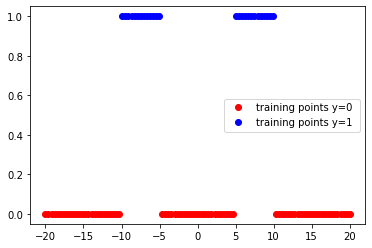

In [8]:
PlotStuff(data_set.x, data_set.y, leg=False)

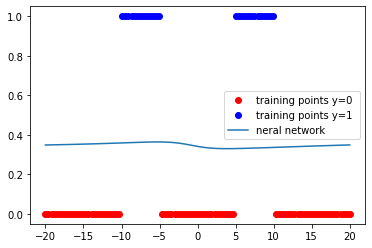

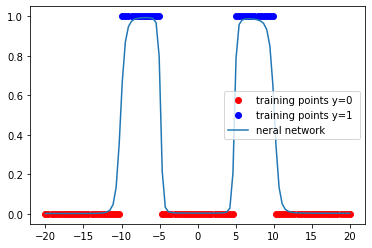

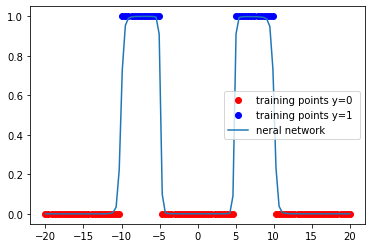

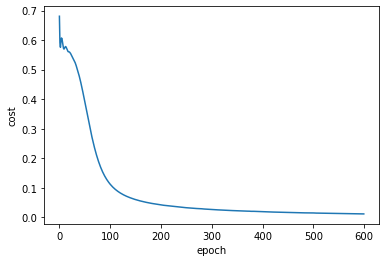

In [13]:
torch.manual_seed(0)
model = Net(1,9,1)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = 0.1
)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST = train(
    data_set,
    model,
    nn.BCELoss(),
    train_loader,
    optimizer,
    epochs = 600,
    plot_numbers = 200
)

In [14]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()
)

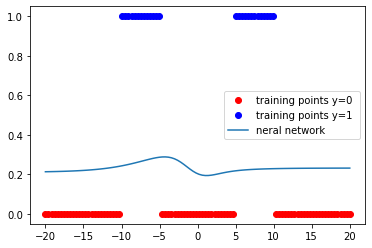

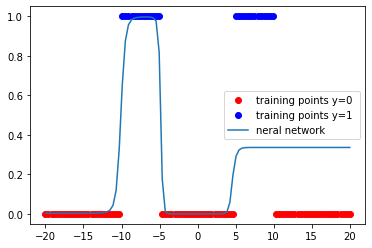

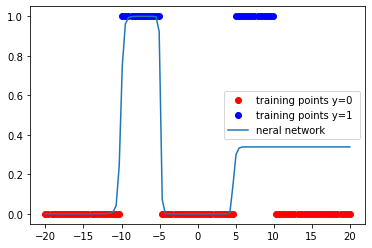

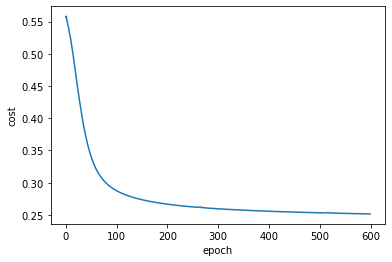

In [17]:
torch.manual_seed(0)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = 0.1
)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST = train(
    data_set,
    model,
    nn.BCELoss(),
    train_loader,
    optimizer,
    epochs = 600,
    plot_numbers = 200
)